In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import scienceplots

from blume.model.post_props import Prop
from blume.process import plot_file, exact_m
from blume.run import new_folder, sweep_T, save

plt.style.use("science")
plt.rcParams["text.usetex"] = True

T_c = 2 / np.log(1 + np.sqrt(2))

In [13]:
dir = new_folder()

for chi in [4, 8, 12, 24]:
    data = sweep_T(
        chi=chi,
        T_range=(2, 2.29),
        step=0.0001,
        tol=1e-9,
        max_steps=int(10e8),
        use_prev=True,
    )
    save(data, dir)

chi = 4: 100%|██████████| 634/634 [02:58<00:00,  3.56it/s]


Saving data in folder: '23-04 14:37'
Done 



chi = 8: 100%|██████████| 634/634 [02:47<00:00,  3.78it/s]


Saving data in folder: '23-04 14:37'
Done 



chi = 12: 100%|██████████| 634/634 [03:32<00:00,  2.98it/s]


Saving data in folder: '23-04 14:37'
Done 



chi = 24: 100%|██████████| 634/634 [06:24<00:00,  1.65it/s]


Saving data in folder: '23-04 14:37'
Done 



In [4]:
# Make dir for saving the plots
dir = "23-04 14:37"
path_dir = f"data/{dir}/plots"
if not os.path.isdir(path_dir):
    os.mkdir(path_dir)

## Phase diagram

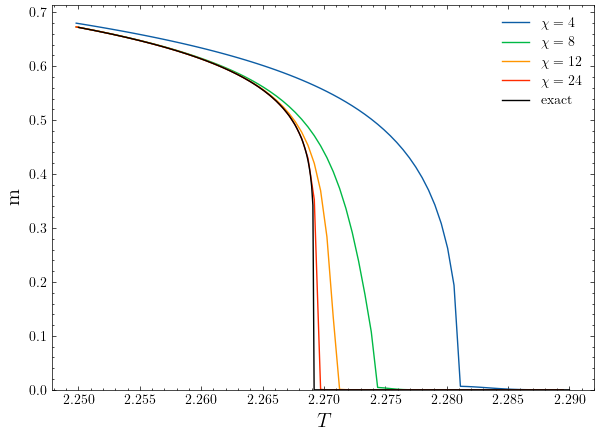

In [5]:
plt.figure(figsize=(7, 5))
T_range = (2.25, 2.29)
chis = [4, 8, 12, 24]
for chi in chis:
    plot_file(chi, range=T_range, prop=Prop.m, folder=dir)
T, m = exact_m(T_range)
plt.plot(T, m, "k-", label="exact")
plt.legend()
plt.xlabel(r"$T$", fontsize=15)
plt.ylabel(r"m", fontsize=15)
plt.ylim(0)
plt.savefig(f"{path_dir}/magnetizations")

## Free energy

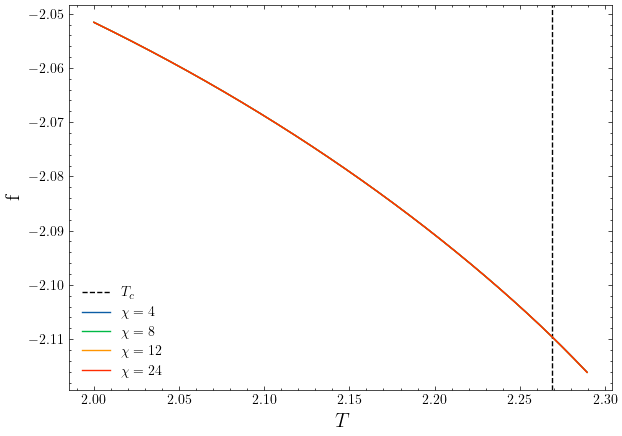

In [6]:
plt.figure(figsize=(7, 5))
T_range = (1, 4)
plt.axvline(T_c, color="k", linestyle="dashed", label=r"$T_c$")
for chi in chis:
    plot_file(chi, range=T_range, prop=Prop.f, folder=dir)

plt.legend()
plt.xlabel(r"$T$", fontsize=15)
plt.ylabel(r"f", fontsize=15)
plt.savefig(f"{path_dir}/free energies")

## Computational cost

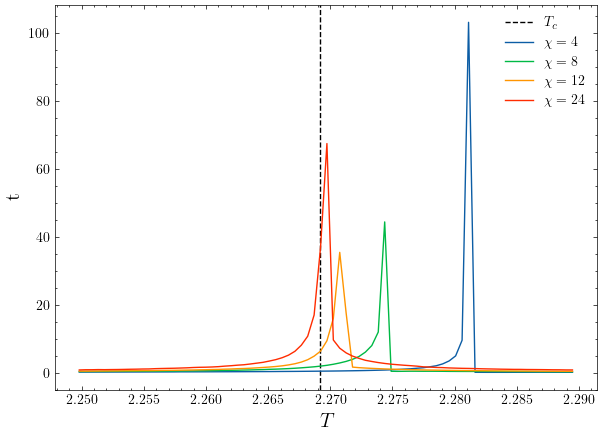

In [7]:
plt.figure(figsize=(7, 5))
T_range = (2.25, 4)
plt.axvline(T_c, color="k", linestyle="dashed", label=r"$T_c$")
for chi in chis:
    plot_file(chi, range=T_range, prop="execution times", folder=dir)

plt.legend()
plt.xlabel(r"$T$", fontsize=15)
plt.ylabel(r"t", fontsize=15)
plt.savefig(f"{path_dir}/execution times")

## Energy per site

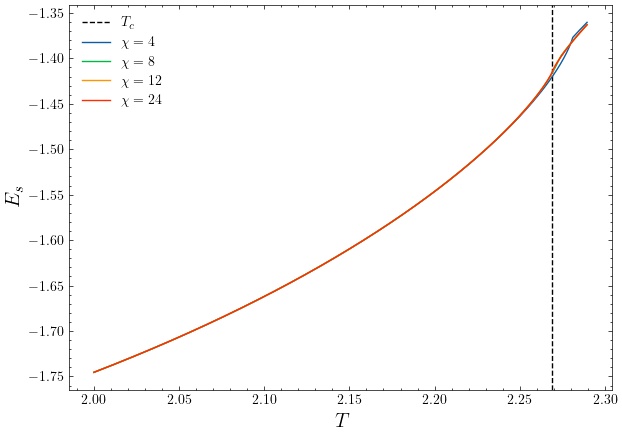

In [8]:
plt.figure(figsize=(7, 5))
plt.axvline(T_c, color="k", linestyle="dashed", label=r"$T_c$")
T_range = (2, 2.3)
for chi in chis:
    plot_file(chi, range=T_range, prop=Prop.Es, folder=dir)
plt.legend()
plt.xlabel(r"$T$", fontsize=15)
plt.ylabel(r"$E_s$", fontsize=15)
plt.savefig(f"{path_dir}/energies per site")